### 第二十四組 : PTT 三峽車禍事件情緒分析

M13B020007   陳學蒨

M134020039   顏淳如

In [1]:
import pandas as pd
import jieba
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 讀取資料
df = pd.read_csv("sna2025s_4_e7dcaf3255_22.csv")

# 過濾含「三峽」與「車禍」的文章
df_filtered = df[df["artContent"].str.contains("三峽") & df["artContent"].str.contains("車禍")].copy()

# 讀取斷詞詞典與停用詞
jieba.set_dictionary("dict/dict.txt")
jieba.load_userdict("dict/user_dict.txt")

with open("dict/stopwords.txt", encoding="utf-8") as f1, \
     open("dict/text_stopwords.txt", encoding="utf-8") as f2:
    stopwords = set(line.strip() for line in f1 if line.strip()) | \
                set(line.strip() for line in f2 if line.strip())

# 對每篇文章進行斷詞與清洗
tokenized_docs = []
for text in df_filtered["artContent"]:
    words = jieba.lcut(text)
    words = [w for w in words if w not in stopwords and len(w) > 1 and not w.isdigit()]
    tokenized_docs.append(words)

# 加入新欄位
df_filtered["tokens"] = [" ".join(words) for words in tokenized_docs]

print("三峽車禍資料（已斷詞）")
print(df_filtered[["artContent", "tokens"]])


Building prefix dict from c:\Users\User\Downloads\中山\資管所\課程\社群媒體分析\期末報告\week4\dict\dict.txt ...
Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.uff78662c5a051baf96ec0228a78fddea.cache
Loading model cost 0.577 seconds.
Prefix dict has been built successfully.


三峽車禍資料（已斷詞）
                                             artContent  \
4     1.媒體來源:\n\n中時\n\n2.記者署名:\n\n黃仲瑜\n\n3.完整新聞標題:\n...   
6     快訊／三峽北大國小旁重大車禍4命危 75歲駕駛「臉部擦傷」送醫\nhttps://cdn2....   
10    2025 / 05 / 19　星期一\n上報 Up Media\n新北車輛暴衝撞國小學生 7...   
13    剛剛看完三峽車禍影片\n太誇張了 完全沒減速 一路撞到底\n機車行人都被撞飛\n那車速是要趕...   
19    台灣各種交通亂象 酒駕毒駕未曾改善\n\n政府還帶頭修法，放寬違停等微罪不罰\n\n\n之前...   
...                                                 ...   
1196  剛剛看完謎案追蹤介紹剴剴案\n\n雖然當時新聞很大，但也都沒有仔細去讀過資料，只知道是一個虐...   
1201  如題  三峽那個暴走阿北撞死學生後自己也升天了\n\n搞了一堆祭品丟在現場還有義工要幫忙處理...   
1205  安安我肥宅啦\n\n這陣子一直發生撞傷，甚至撞死多人的車禍\n\n有不少起的肇事者，多是高齡...   
1213  隔熱紙一直不是肇事主因,三峽殺人車禍案後,交通部卻拿隔熱紙開刀\n\n,迫切解決的是老車煞車...   
1215  媒體來源: 中時新聞網\n\n記者署名: 高鈞麟\n\n\n三峽車禍逝世國中生告別式 父親哽...   

                                                 tokens  
4     媒體 來源 中時 記者 署名 仲瑜 完整 新聞 標題 快訊 三峽 北大 國小 車輛 暴衝 家...  
6     快訊 三峽 北大 國小 重大 車禍 命危 駕駛 臉部 擦傷 送醫 https cdn2 et...  
10    星期一 上報 Up Media 新北 車輛 衝撞 國小 學生 學童 失去 呼吸 心跳 上報 ...  
13    剛剛 看完 三峽 車禍 影片 誇張 完全 減速 一路 撞到 機車 行人 撞飛 車速

In [14]:
from collections import defaultdict

# 建立 LIWC 對照字典：一個詞可能對應多個類別（先建立為 list 結構）
liwc_dict = defaultdict(list)
for _, row in df_liwc.iterrows():
    word = row["name"]
    category = row["class"]
    liwc_dict[word].append(category)

# 計算每個心理類別的出現次數
category_counter = defaultdict(int)
for doc in tokenized_docs:
    for word in doc:
        if word in liwc_dict:
            for category in liwc_dict[word]:
                category_counter[category] += 1

# 轉為 DataFrame 顯示前幾名類別
df_liwc_stat = pd.DataFrame(category_counter.items(), columns=["情緒類別", "出現次數"])
df_liwc_stat = df_liwc_stat.sort_values("出現次數", ascending=False).reset_index(drop=True)

print("三峽車禍情緒語彙統計")
print(df_liwc_stat)


三峽車禍情緒語彙統計
       情緒類別  出現次數
0    affect  3527
1  negative  2106
2  positive  1273
3       sad   461
4       anx   419
5     anger   321


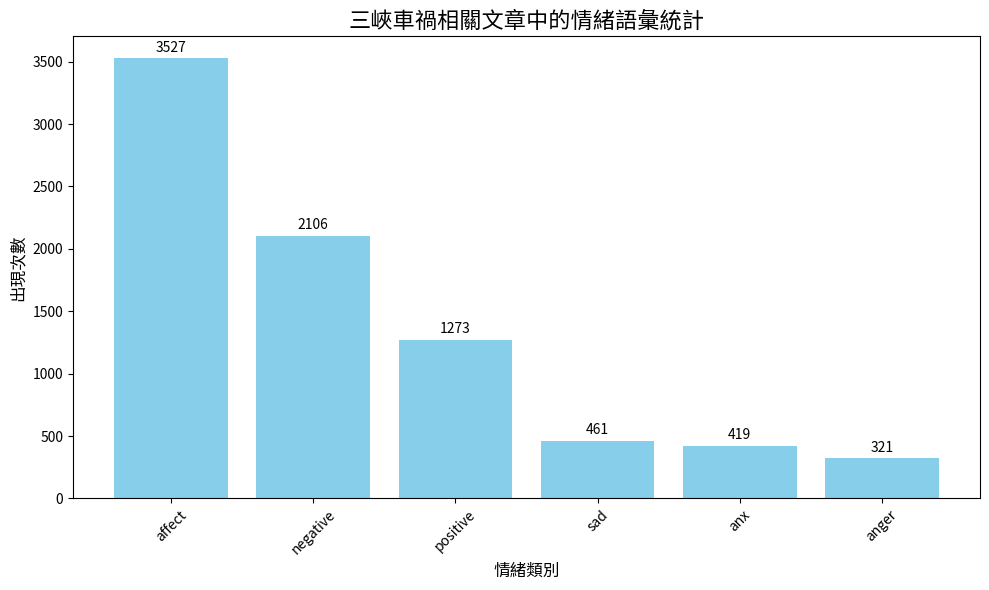

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm
from collections import defaultdict

# 設定中文字體（請確認字體檔案路徑正確）
fm.fontManager.addfont("dict/SourceHanSansTW-Regular.otf")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Source Han Sans TW']
rcParams['axes.unicode_minus'] = False

# 載入 LIWC 詞庫
df_liwc = pd.read_csv("dict/liwc/LIWC_CH.csv")

# 建立詞 → 類別對照字典
liwc_dict = defaultdict(list)
for _, row in df_liwc.iterrows():
    word = row["name"]
    category = row["class"]
    liwc_dict[word].append(category)

# tokenized_docs 是前面已處理好的斷詞結果，請確保有這個變數
# 若你剛好已從斷詞得到這個變數，請直接接續以下統計
category_counter = defaultdict(int)
for doc in tokenized_docs:
    for word in doc:
        if word in liwc_dict:
            for category in liwc_dict[word]:
                category_counter[category] += 1

# 整理成 DataFrame
df_liwc_stat = pd.DataFrame(category_counter.items(), columns=["情緒類別", "出現次數"])
df_liwc_stat = df_liwc_stat.sort_values("出現次數", ascending=False).reset_index(drop=True)

# 畫出 bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_liwc_stat["情緒類別"], df_liwc_stat["出現次數"], color="skyblue")
plt.title("三峽車禍相關文章中的情緒語彙統計", fontsize=16)
plt.xlabel("情緒類別", fontsize=12)
plt.ylabel("出現次數", fontsize=12)
plt.xticks(rotation=45)

# 加上數字標籤
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# 每篇文章斷詞 + 計算情緒值
records = []
for _, row in df.iterrows():
    text = row["artContent"]
    date = row["artDate"]
    tokens = [w for w in jieba.lcut(text) if len(w) > 1 and w not in stopwords]

    pos_count = sum("positive" in liwc_dict[w] for w in tokens if w in liwc_dict)
    neg_count = sum("negative" in liwc_dict[w] for w in tokens if w in liwc_dict)
    total = pos_count + neg_count
    ratio_pos = pos_count / total if total > 0 else 0
    ratio_neg = neg_count / total if total > 0 else 0
    sentiment_score = pos_count - neg_count

    records.append({
        "artDate": date,
        "positive": pos_count,
        "negative": neg_count,
        "ratio_pos": ratio_pos,
        "ratio_neg": ratio_neg,
        "sentiment_value": sentiment_score
    })

# 匯出結果
df_sentiment = pd.DataFrame(records)
df_sentiment.to_csv("三峽車禍_文章情緒分析結果.csv", index=False, encoding="utf-8-sig")
print("已儲存為：三峽車禍_文章情緒分析結果.csv")


分析完成，結果已儲存為：三峽車禍_文章情緒分析結果.csv


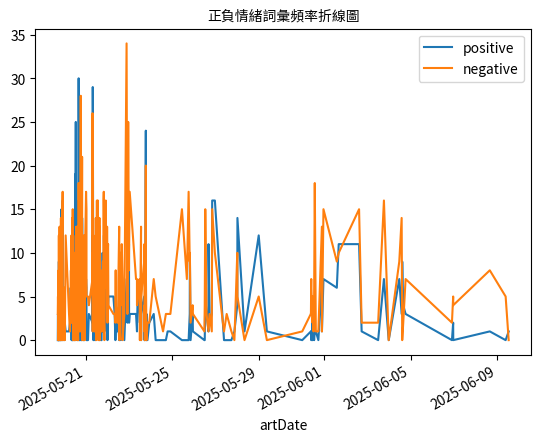

In [ ]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖", fontproperties=fprop)  
plt.show()

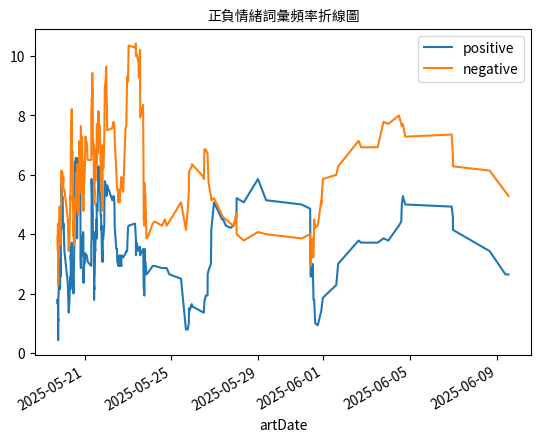

In [60]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

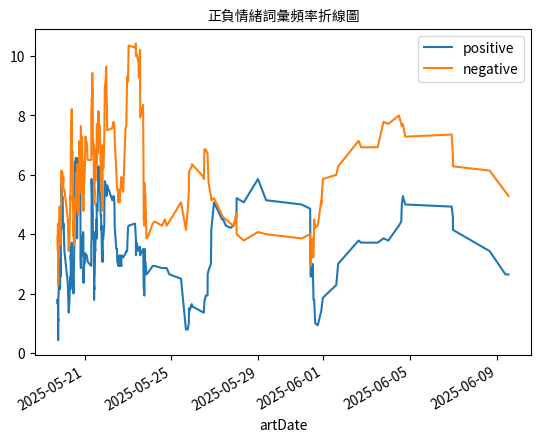

In [62]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

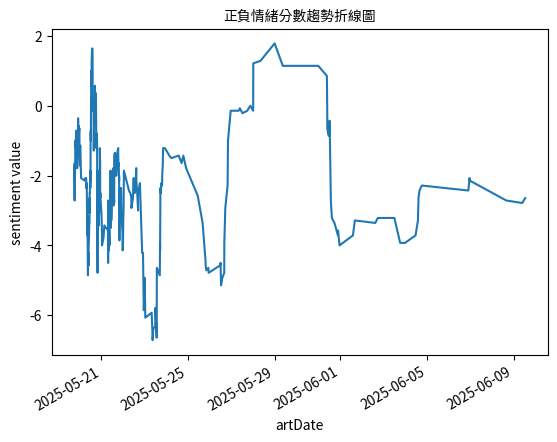

In [66]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()


# sentiment 計算方式: positive - negative
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["negative"]
)
ptt_sentiment_value.head()



fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖", fontproperties=fprop)

C:\Users\User\AppData\Local\Temp\ipykernel_28612\2812679479.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
C:\Users\User\AppData\Local\Temp\ipykernel_28612\2812679479.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(neg["word"], fontproperties=fprop)


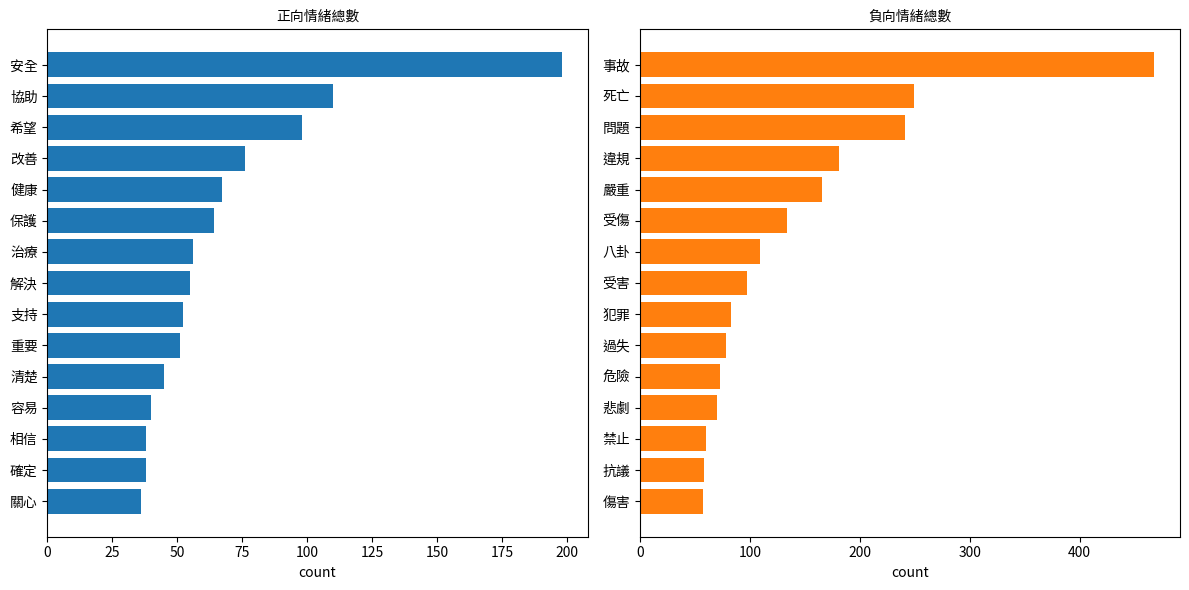

In [ ]:
import pandas as pd
import jieba
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 字體與顏色設定
font_path = "dict/SourceHanSansTW-Regular.otf"
fprop = FontProperties(fname=font_path)
colors = ["tab:blue", "tab:orange"]

# 載入原始文章資料
df = pd.read_csv("sna2025s_4_e7dcaf3255_22.csv")
liwc_dict = pd.read_csv("dict/liwc/LIWC_CH.csv").rename(columns={'name': 'word', 'class': 'sentiments'})

# 前處理：清洗文章內文
df["sentence"] = df["artContent"].str.replace(r'\n\n', '。', regex=True)
df["sentence"] = df["sentence"].str.replace(r'\n', '', regex=True)
df["sentence"] = df["sentence"].replace(r'http\S+|www\S+', '', regex=True)
df["sentence"] = df["sentence"].str.split("[,，。！!？?]{1,}")
sent_df = df.explode("sentence").dropna(subset=["sentence"])
sent_df["sentence"] = sent_df["sentence"].str.replace(r"[^\w\s]+", "", regex=True)
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

# 斷詞＋去除停用詞
sent_df["word"] = sent_df["sentence"].apply(jieba.lcut)
word_df = sent_df.explode("word")
word_df = word_df[word_df["word"].str.len() > 1]

stopwords = set(line.strip() for line in open("dict/stopwords.txt", encoding="utf-8") if line.strip())
word_df = word_df[~word_df["word"].isin(stopwords)]

# 合併情緒標籤
ptt_liwc_df = pd.merge(word_df[["artDate", "artContent", "word"]], liwc_dict, how="left")

# 詞頻統計
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index(name="size")
word_count = word_count.sort_values("size", ascending=False)
word_of_pos = word_count[word_count["sentiments"] == "positive"]
word_of_neg = word_count[word_count["sentiments"] == "negative"]
pos = word_of_pos.head(15).sort_values("size", ascending=True)
neg = word_of_neg.head(15).sort_values("size", ascending=True)

# 繪圖
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_title("正向情緒總數", fontproperties=fprop)
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_title("負向情緒總數", fontproperties=fprop)
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)

plt.tight_layout()
plt.show()
